## test the pylamost

In order to access protected LAMOST data, you should provide your token.
Your token can be obtained from http://dr.lamost.org/ucenter/mytoken, the "Password" is the token.
When you get your token you can also create a file `~/pylamost.ini` or `%userprofile%/pylamost.ini` on Windows, with content:
```
token=12345678
```
Then you don't have to write the token next time.

In [1]:
from pylamost import lamost
lm=lamost()#init the lamost class
#lm.token='12345678'#specify your token. You can pass this step, if you created the ~/pylamost.ini file.
lm.dataset=5 #specify the Data Release number
lm.version=1 #specify the data version, or leave it None to always use the leatest version.

In [2]:
lm.downloadQueryResult(10353, '10353.csv')

### Query interface

In [3]:
params={'output.fmt':'csv','obsidTextarea':'353301001'}
hl=lm.query(params)
print(hl)

#	Powered by Chinese Virtual Observatory (China-VO): www.china-vo.org 2018-07-19 20:07:20
#	In case of problem: please contact support@lamost.org
#----------------------------------------------------------------------------
#	obsid|long|I8|
#	ra|double|F16.10|
#	dec|double|F16.10|
#----------------------------------------------------------------------------
obsid|ra|dec
353301001|341.0645660000|19.5665910000



In [4]:
params={'output.fmt':'csv','pos.type':'proximity'}
files={'pos.posfile':('sample.txt', open('sample.txt', 'r'))}
hl=lm.query2(params, files)
print(hl)

#	Powered by Chinese Virtual Observatory (China-VO): www.china-vo.org 2018-07-19 20:07:33
#	In case of problem: please contact support@lamost.org
#----------------------------------------------------------------------------
#	input_id|int|I8|Identifier of the input-object
#	input_ra|double|F16.10|RA of the input-object
#	input_dec|double|F16.10|Dec of the input-object
#	dist|double|F16.10|Distance between LAMOST and the input ojbect, in arcsec
#	obsid|long|I8|
#	ra|double|F16.10|
#	dec|double|F16.10|
#----------------------------------------------------------------------------
input_id|input_ra|input_dec|dist|obsid|ra|dec
0|341.343583|19.510335|0.001439999988081657|353301002|341.3435830000|19.5103354000
1|341.364474|19.595276|0.0|353301023|341.3644740000|19.5952760000
2|340.560232|19.855086|0.0|353301041|340.5602320000|19.8550860000



### SQL query interface

In [5]:
s=lm.sql("select c.obsid,c.obsdate, c.ra, c.dec, c.z, c.lmjd from catalogue c where spos(c.ra,c.dec) @ scircle '<(331.7d, -1.4d),0.2d>' limit 5")
print(s)

#	Powered by Chinese Virtual Observatory (China-VO): www.china-vo.org 2018-07-19 20:08:39
#	In case of problem: please contact support@lamost.org
#----------------------------------------------------------------------------
#	obsid|null|null|null
#	obsdate|null|null|null
#	ra|null|null|null
#	dec|null|null|null
#	z|null|null|null
#	lmjd|null|null|null
#----------------------------------------------------------------------------
obsid|obsdate|ra|dec|z|lmjd
55909199|2012-09-29|331.8092240000|-1.2332930000|-9999.0000000000|56200
55909031|2012-09-29|331.6678420000|-1.5263160000|-9999.0000000000|56200
101064|2011-10-24|331.8286840000|-1.5413520000|-0.0003155500|55859
101068|2011-10-24|331.8531700000|-1.3794250000|0.0028779900|55859
101057|2011-10-24|331.6727940000|-1.5492890000|-0.0004733500|55859



### simple information

In [6]:
info=lm.getInfo('353301001')
for k,v in info.items():
    print(k,':',v)

obsid : 353301001
designation : J224415.49+193359.7
obsdate : 2015-09-12
mjd : 57277
lmjd : 57278
planid : EG224429N215706B01
spid : 1
fiberid : 1
ra : 341.0645660000
dec : 19.5665910000
class : STAR
subclass : K7
z : 0.0000400277
logg : 4.701
teff : 4141.41
feh : -0.323
rv : 12.00


### download FITS file

In [7]:
lm.downloadFits(obsid='353301001',savedir='./')

'.//spec-57278-EG224429N215706B01_sp01-001.fits.gz'

### download png

In [9]:
lm.downloadPng(obsid='353301007',savedir='./')

### download csv format spectrum

In [8]:
csv = lm.getFitsCsv(obsid='353301007')
print(csv)

Wavelength,Flux,FluxSmooth,FluxSmooth
3699.985312,474.216156,474.216156,364.588196
3700.837581,511.423279,474.216156,364.588196
3701.690047,493.287415,474.216156,376.633545
3702.542708,498.277740,474.216156,376.633545
3703.395567,459.725311,459.725311,388.815247
3704.248622,432.466461,432.466461,388.815247
3705.101873,388.815247,388.815247,402.437042
3705.955321,364.588196,376.633545,409.560608
3706.808965,358.510040,376.633545,409.560608
3707.662806,376.633545,376.633545,409.560608
3708.516844,369.942780,376.633545,409.560608
3709.371078,402.437042,387.634308,409.560608
3710.225509,387.634308,402.437042,409.560608
3711.080137,409.560608,409.560608,409.560608
3711.934962,442.840942,442.840942,442.840942
3712.789984,470.741638,468.558655,468.558655
3713.645203,468.558655,470.741638,468.558655
3714.500619,529.474854,515.789246,468.558655
3715.356231,515.789246,515.789246,468.558655
3716.212041,524.817017,524.817017,468.558655
3717.068048,538.404724,524.817017,468.558655
3717.924252,499.5

### Cone Search Protocol

In [9]:
cs = lm.conesearch(ra=10.0004738,dec=40.9952444,radius=0.2)
print(cs)

<?xml version="1.0" encoding="UTF-8"?>
<VOTABLE xsi:schemaLocation="http://www.ivoa.net/xml/VOTable/v1.2 http://vo.ari.uni-heidelberg.de/docs/schemata/VOTable-1.2.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ivoa.net/xml/VOTable/v1.2" version="1.2">
<RESOURCE type="results">
<DESCRIPTION>Powered by Chinese Virtual Observatory (China-VO): http://www.china-vo.org Thu Jul 19 20:11:36 CST 2018 In case of problem, please contact:	support@lamost.org
</DESCRIPTION><INFO name="SERVICE_PROTOCOL" value="1.2">ConeSearch</INFO>
<INFO name="QUERY_STATUS" value="OK"></INFO>
<TABLE>
<FIELD ID="COLID_33326" name="obsid" datatype="char" arraysize="*" ucd="ID_MAIN">
<DESCRIPTION></DESCRIPTION>
</FIELD>
<FIELD ID="COLID_33327" name="designation" datatype="char" arraysize="*" ucd="">
<DESCRIPTION></DESCRIPTION>
</FIELD>
<FIELD ID="COLID_33328" name="obsdate" datatype="char" arraysize="*" ucd="">
<DESCRIPTION></DESCRIPTION>
</FIELD>
<FIELD ID="COLID_33329" name="lmjd" dataty

### Simple Spectral Access Protocol

In [10]:
ssap = lm.ssap(ra=10.0004738,dec=40.9952444,radius=0.2)
print(ssap)

<?xml version="1.0" encoding="UTF-8"?>
<VOTABLE xmlns:ssa="http://www.ivoa.net/xml/DalSsap/v1.0" xsi:schemaLocation="http://www.ivoa.net/xml/VOTable/v1.2 http://vo.ari.uni-heidelberg.de/docs/schemata/VOTable-1.2.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ivoa.net/xml/VOTable/v1.2" version="1.2">
<RESOURCE type="results">
<DESCRIPTION>Powered by Chinese Virtual Observatory (China-VO): http://www.china-vo.org Thu Jul 19 20:11:54 CST 2018 In case of problem, please contact:	support@lamost.org
</DESCRIPTION><INFO name="SERVICE_PROTOCOL" value="1.1">SSAP</INFO>
<INFO value="OK" name="QUERY_STATUS"></INFO>
<TABLE name="result">
<PARAM name="DataModel" utype="ssa:Dataset.DataModel" datatype="char" arraysize="*" value="Spectrum 1.0" />
<PARAM name="Publisher" utype="ssa:Curation.Publisher" ucd="meta.curation" datatype="char" arraysize="*" value="Chinese Virtual Observatory" />
<FIELD ID="COLID_33326" name="obsid" utype="" datatype="long" ucd="meta.id">
<DESCRI

### read local spectrum fits to data array

In [13]:
wavelength, specflux, spec_smooth_7, spec_smooth_15=lm.readFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')
#print('wavelength', wavelength)
#print('specflux', specflux)
#print('spec_smooth_7', spec_smooth_7)
#print('spec_smooth_15', spec_smooth_15)

### plot local spectrum

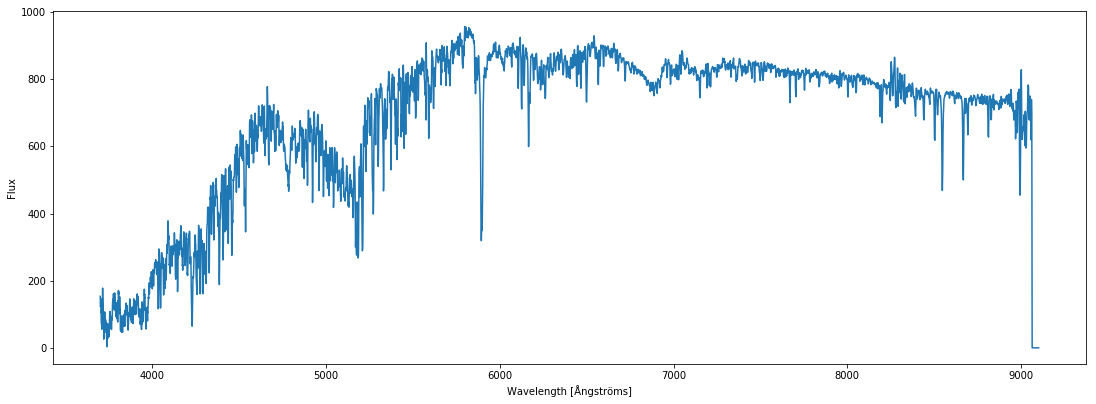

In [11]:
lm.plotFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')

### download spectrum data and plot

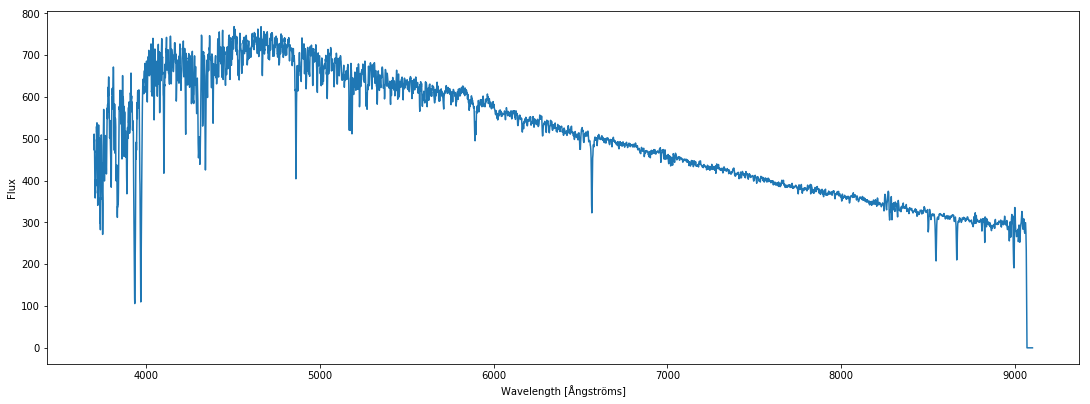

In [12]:
lm.downloadAndPlotSpectrum('353301007')